# Tensors Basics and Linear Regression

### Machine Learning and Deep Learning Series


*Author:*

**Soumyadip Bhattacharjya**

BSc Physics, MCA

1. [Github](https://github.com/SoumyaCO)
2. [Kaggle](https://www.kaggle.com/soumyadipbhat)
3. [LinkedIN](https://www.linkedin.com/in/soumyadip-bhattacharjya-993974234)

---
<a id="0"></a> <br>
 # Table of Contents 
 1. [Prerequisite](#0)
 1. [tensors and vectors](#1)
    1. [Why use tensors?](#1.1)
    1. [Difference b/w Tensors and Vectors](#1.2)
 1. [Why use PyTorch](#2)
    1. [PyTorch Installation](#2.1)
    1. [Basics of PyTorch](#2.2)
 1. [Linear Regression](#3) 

<a id='0'></a>
### Prerequisite:
> 1. Minimum Understanding of Vectors, Linear Algebra, Matrix
> 2. Intermediate Knowledge in Python (list slicing, indexing etc ..)
> 3. Google Colab Account/Kaggle Account

<a id="1"><a/>
### Tensors and Vectors

![Different Tensors](https://visagetechnologies.com/app/uploads/2022/08/Tensors.png)
_Credit: [visagetechnologies.com](https://visagetechnologies.com/tensors-in-computer-vision/)_

__Definition:__ A Tensor is a finite table of neumerical values indexing along several dimensions.

- 0d tensor $\rightarrow$ it's a scalar (e.g. _5_)
- 1d tensor $\rightarrow$ it's vector
- 2d tensor $\rightarrow$ it's a matrix (e.g. grascale image, DataFrame)
- 3d tensor $\rightarrow$ it can be an Image (coloured)
- 4d tensor $\rightarrow$ video (a sequence of multi channel images)
- and so on ..

<a id='1.1'></a>
#### Why we use Tensors?
From simple matrix multiplication to complex convolutions and pooling in CNNs, it is used everywhere

- Through Tensors we can represent more diverse datatypes
- Manipulating data through this structure is very fast in CPUs and GPUs


<a id='1.2'></a>
#### Difference b/w Tensors and Vectors
![Vectors vs tensors](Media/tensor_vs_Vector.gif)

The "dimension" of a __vector__ in linear algebra is its number of coefficients, 

while the "dimension" of a __tensor__ is the number of indeices to specify one of its coefficients.

<a id='2'></a>
### Why use PyTorch

1. We can make the calculations on CPU and GPUs
2. Automatic Gradient Calculation (more on this later)
3. More cutomisable controls over the program
4. Optimizers
5. Data I/O

<a id='2.1'></a>
#### PyTorch Installation:

![PyTorch Installing](Media/pytoch_installation.png)

> 1. Go to the [Official PyTorch Website](https://pytorch.org/get-started/locally/)
> 2. Select your platform (options)
> 3. Copy the Command and paste it in the terminal

<a id='2.2'></a>
#### Basics of PyTorch

In [1]:
# import the PyTorch Library
import torch

In [2]:
# Check the version
torch.__version__

'2.2.1'

In [3]:
# Also you can check for GPU availability
torch.cuda.is_available()

False

I am using an M1 Mac so `Cuda` is not available. But there is an accelerator called mps (it runs on mac GPU)

In [4]:
# Check for mps 
torch.backends.mps.is_available()

True

__Basic Tensor declaration__

In [5]:
t1 = torch.tensor([2, 3, 4])
t1

tensor([2, 3, 4])

In [6]:
# 2d tensor
t2 = torch.tensor([[2, 3, 4],
                 [5, 6, 8]])
t2

tensor([[2, 3, 4],
        [5, 6, 8]])

In [7]:
# We can determine the size of a tensor by `size` method
t1.size(), t2.size()

(torch.Size([3]), torch.Size([2, 3]))

In [8]:
# Similarly we can get their number of dimensions also
print(f"Dimension of t1: {t1.dim()}\nDimension of t2: {t2.dim()}")

Dimension of t1: 1
Dimension of t2: 2


It provides aggregation functions like sum, mean etc.

In [9]:
t1.sum()

tensor(9)

In [10]:
t2.sum()

tensor(28)

We can see it returns a 0 dimensional tensor. To get it in form of a scalar we can use `.item()` method.

In [11]:
t2.sum().item()

28

It offers elementwise operations unlike a python list (and like numpy, but it has GPU acceleration)

In [12]:
x_list = [10., 20., 30.]
y_list = [[1., 3., 4.]]
x = torch.tensor([10., 20., 30.])
y = torch.tensor([1., 3., 4.])
print(f"PyTorch Tensor Output: {x + y}\nPython List Output: {x_list + y_list}")

PyTorch Tensor Output: tensor([11., 23., 34.])
Python List Output: [10.0, 20.0, 30.0, [1.0, 3.0, 4.0]]


As NumPy we can have random tensors too.

In [13]:
x = torch.randint(10, (2, 4))  #<---- (range, (shape))
x

tensor([[6, 4, 2, 4],
        [7, 7, 3, 5]])

<a id='3'></a>
### Linear Regression

For Linear Regression we assume that our features (X) depends on y linearly, and try to fit a line with approprieate slope and bias values.

In order to explain this I'm going to take a small toy dataset.

In [14]:
import pandas as pd   #<--- for data manipulations
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('systolic-blood-pressure-vs-age.csv')
data.head()

,age,blood_pressure
0,39,144
1,47,220
2,45,138
3,47,145
4,65,162


If we plot a graph we can notice a linear relationship between the `age` and `blood_pressure`

<Axes: xlabel='age', ylabel='blood_pressure'>

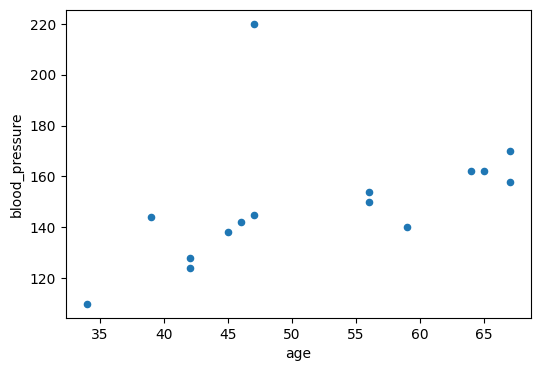

In [16]:
data.plot(kind='scatter', x='age', y='blood_pressure', figsize=(6, 4))

Also the data is not entirely linear, it has some noise and also some outliers as we can see in the plot.

<img src='Media/plot_outlier.png' style="height:300px;"/>

Now we have to define the model (linear regressor) which is very simple
The equation of the model is:

<h1>$$y = w x + b$$</h1>

where,
- w $\rightarrow$ weight (slope)
- b $\rightarrow$ bias (offset)

First we initialized with a random value (for now just take it as zero).

And plot the line, calculate the loss either.. MSE (mean squared error) or MAE (mean absolute error))

![loss_reg_](Media/reg_loss_.gif)